# Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

Read the data

In [55]:

data = pd.read_csv("C:/Users/ssair/datasets/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


check for missing values

In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data2 = data.rename({'R&D Spend': 'RD','Marketing Spend':'MS'}, axis=1)

In [9]:
data2.head()

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Correlation Matrix

In [10]:
data2.corr()

,RD,Administration,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

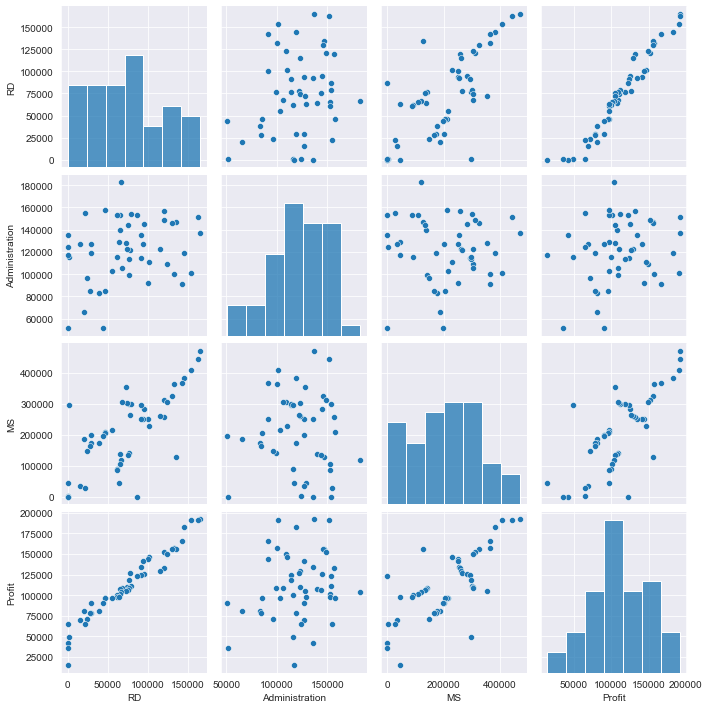

In [11]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data2)

# Preparing a model

In [12]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+Administration+MS',data=data2).fit()

In [13]:
#Coefficients
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RD                17.846374
Administration    -0.525507
MS                 1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [16]:
#RD+Administration+MS

In [17]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RD~Administration+MS",data=data2).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RD+MS",data=data2).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~RD+Administration",data=data2).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RD','Administration','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.468903
1,Administration,1.175091
2,MS,2.326773


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

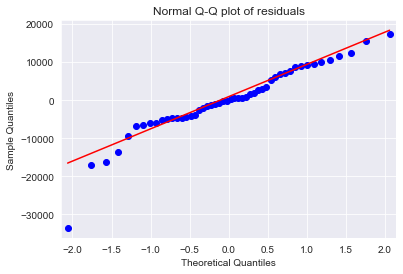

In [18]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [20]:
# for Z score formula 
# also able to use package - scipy.stats.zscore(arr, axis=0, ddof=0)  pass array
# function computes the relative Z-score of the input data, relative to the sample mean and standard deviation
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

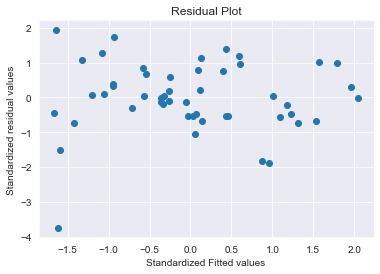

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

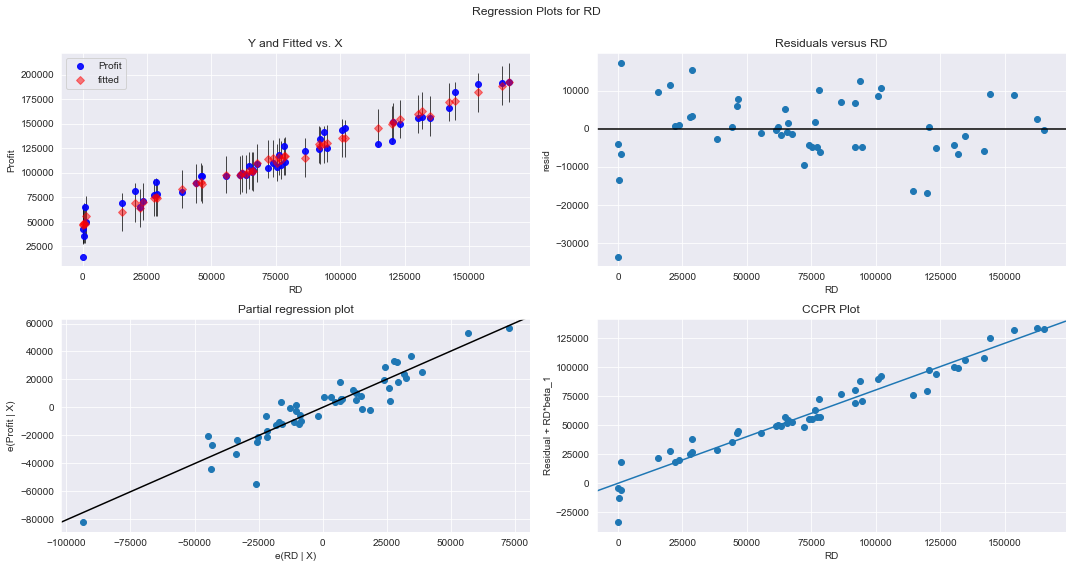

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

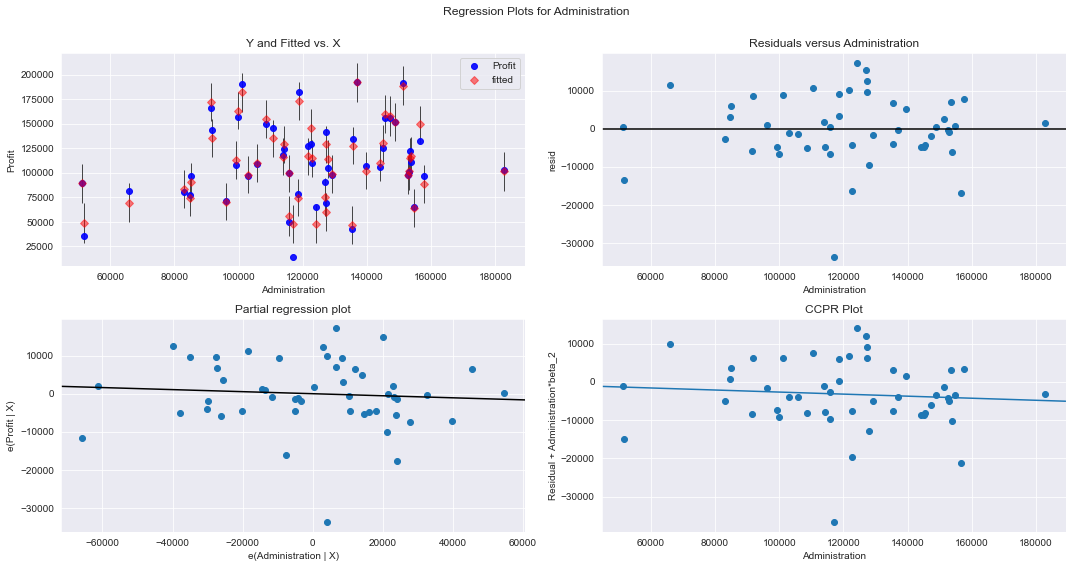

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

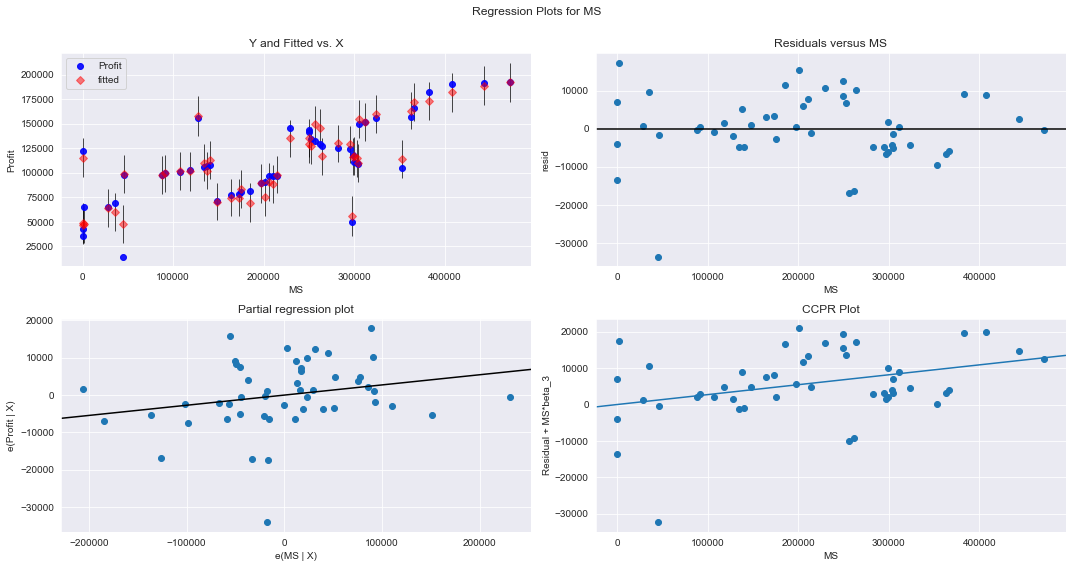

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Cook’s Distance

In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

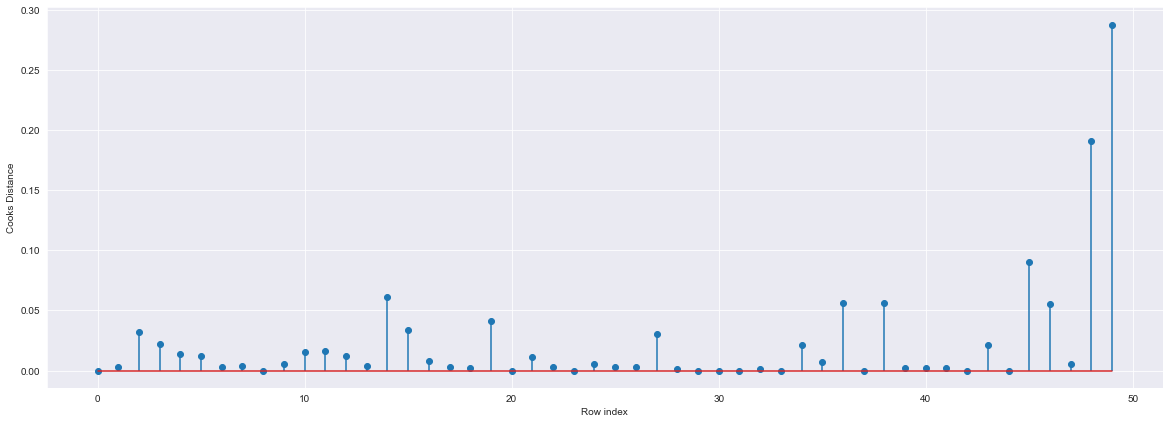

In [26]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

## High Influence points

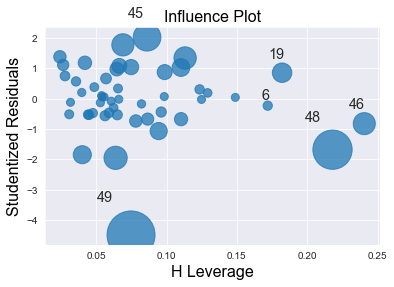

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [29]:
data2[data2.index.isin([49, 48])]

,RD,Administration,MS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Improving the model

In [30]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data3=data2.drop(data2.index[[48,49]],axis=0).reset_index()

In [31]:
#Drop the original index
data3=data3.drop(['index'],axis=1)

In [32]:
#data3

# Model Building Again

In [33]:
#Build model
import statsmodels.formula.api as smf 
model2 = smf.ols('Profit~RD+Administration+MS',data=data3).fit()

In [34]:
(model2.rsquared,model2.aic)

(0.9626766170294073, 994.6690439260116)

# Model Deletion Diagnostics

In [35]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

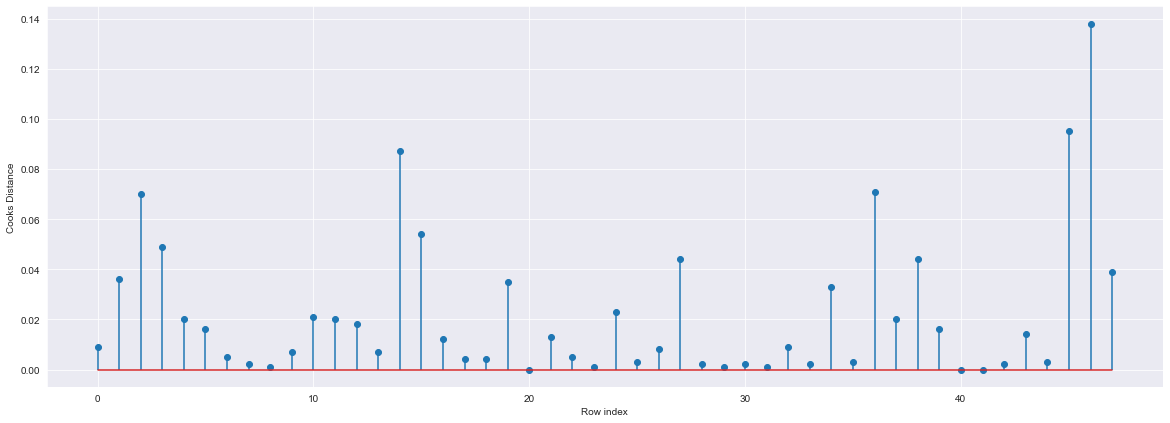

In [36]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(46, 0.13829133994334533)

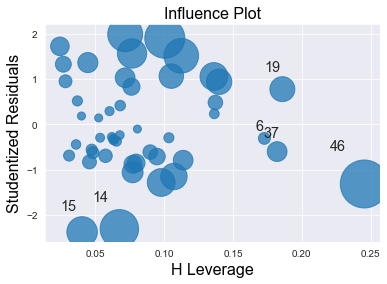

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [39]:
data2[data2.index.isin([46])]

,RD,Administration,MS,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75


In [40]:
Final=data3.drop(data3.index[[46]],axis=0).reset_index()

In [41]:
Final=Final.drop(['index'],axis=1)

# Model Building - Final

In [42]:
#Build model
import statsmodels.formula.api as smf 
Model3 = smf.ols('Profit~RD+Administration+MS',data=Final).fit()

In [43]:
(Model3.rsquared,Model3.aic)

(0.9614129113440602, 973.2489443962854)

# Finalizing  the Model -2  base on R^2


# Predictions using model 2 

In [44]:
new_data=pd.DataFrame({'RD':5000,"Administration":1000,"MS":8542},index=[0])
new_data

,RD,Administration,MS
0,5000,1000,8542


In [51]:
model2.predict(new_data)

0    63126.936271
dtype: float64

In [52]:
pred_y=model2.predict(Final)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     50519.334182
dtype: float64

# Table for each model with their R^2 values.

In [54]:
d2={'Prep_Models':['Model','Model2','Model3'],'Rsquared':[model.rsquared,model2.rsquared,Model3.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model2,0.962677
2,Model3,0.961413


# So, Model 2 is good for preductions.